In [28]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import tensorflow as tf
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

In [44]:
creatures = pd.read_csv('creatures_cleaned.csv', index_col=[0])
noncreatures = pd.read_csv('noncreatures_cleaned.csv',index_col=[0])
creatures = creatures.reset_index(drop=True)
noncreatures = noncreatures.reset_index(drop=True)

In [45]:
for index, row in creatures.iterrows():
    prices = row['prices']
    bucket = 0
    if prices <= 5:
        bucket = 0
    elif prices <= 10:
        bucket =1
    elif prices <=20:
        bucket = 2
    elif prices <= 50:
        bucket = 3
    else:
        bucket = 4
    creatures.loc[index, 'price_bucket'] = bucket
creatures

,name,mana_cost,cmc,oracle_text,power,toughness,prices,set,rarity,price_bucket
0,Storm Crow,{1}{U},2.0,Flying (This creature can't be blocked except ...,1.0,2.0,0.20,9ed,0,0.0
1,Walking Sponge,{1}{U},2.0,{T}: Target creature loses your choice of flyi...,1.0,1.0,0.15,ulg,1,0.0
2,Pteramander,{U},1.0,Flying {7}{U}: Adapt 4. This ability costs {1}...,1.0,1.0,0.15,rna,1,0.0
3,Nantuko Elder,{2}{G},3.0,{T}: Add {C}{G}.,1.0,2.0,0.56,ody,1,0.0
4,Vedalken Heretic,{G}{U},2.0,Whenever This Card deals damage to an opponent...,1.0,1.0,0.26,arb,2,0.0
...,...,...,...,...,...,...,...,...,...,...
12152,Borderland Ranger,{2}{G},3.0,When This Card enters the battlefield you may...,2.0,2.0,0.05,avr,0,0.0
12153,Quarry Beetle,{4}{G},5.0,When This Card enters the battlefield you may...,4.0,5.0,0.06,hou,1,0.0
12154,Devoted Hero,{W},1.0,_,1.0,2.0,0.18,s99,0,0.0
12155,Firesong and Sunspeaker,{4}{R}{W},6.0,Red instant and sorcery spells you control hav...,4.0,6.0,0.30,2x2,2,0.0


In [46]:
for index, row in noncreatures.iterrows():
    prices = row['prices']
    bucket = 0
    if prices <= 5:
        bucket = 0
    elif prices <= 10:
        bucket =1
    elif prices <=20:
        bucket = 2
    elif prices <= 50:
        bucket = 3
    else:
        bucket = 4
    noncreatures.loc[index, 'price_bucket'] = bucket
noncreatures

,name,mana_cost,cmc,oracle_text,prices,set,rarity,price_bucket
0,Static Orb,{3},3.0,As long as This Card is untapped players can'...,20.58,7ed,2,3.0
1,Sensory Deprivation,{U},1.0,Enchant creature Enchanted creature gets -3/-0.,0.04,m14,0,0.0
2,Road of Return,{G}{G},2.0,Choose one — • Return target permanent card fr...,0.24,c19,2,0.0
3,Ravnica at War,{3}{W},4.0,Exile all multicolored permanents.,0.23,war,2,0.0
4,Torrent of Fire,{3}{R}{R},5.0,This Card deals damage to any target equal to ...,0.12,scg,0,0.0
...,...,...,...,...,...,...,...,...
10329,Curse of Thirst,{4}{B},5.0,Enchant player At the beginning of enchanted p...,0.30,dka,1,0.0
10330,Temporary Truce,{1}{W},2.0,Each player may draw up to two cards. For each...,11.45,por,2,2.0
10331,Clearwater Goblet,{5},5.0,Sunburst (This enters the battlefield with a c...,0.44,5dn,2,0.0
10332,Without Weakness,{1}{B},2.0,Target creature you control gains indestructib...,0.04,hou,0,0.0


In [47]:
for index, row in creatures.iterrows():
    mana_cost = row['mana_cost']
    cmc = row['cmc']
    power = row['power']
    toughness = row['toughness']
    rarity = row['rarity']
    price = row['price_bucket']
    completed_string = f"The mana cost of this card is {mana_cost}. The converted mana cost of this card is {cmc}. The power of this creature is {power}. The toughness of this card is {toughness}. The rarity of this card is {rarity}. The oracle text is as follows: {row['oracle_text']}. The price bucket is {price}."
    creatures.loc[index, 'compiled_text'] = completed_string
creatures

,name,mana_cost,cmc,oracle_text,power,toughness,prices,set,rarity,price_bucket,compiled_text
0,Storm Crow,{1}{U},2.0,Flying (This creature can't be blocked except ...,1.0,2.0,0.20,9ed,0,0.0,The mana cost of this card is {1}{U}. The conv...
1,Walking Sponge,{1}{U},2.0,{T}: Target creature loses your choice of flyi...,1.0,1.0,0.15,ulg,1,0.0,The mana cost of this card is {1}{U}. The conv...
2,Pteramander,{U},1.0,Flying {7}{U}: Adapt 4. This ability costs {1}...,1.0,1.0,0.15,rna,1,0.0,The mana cost of this card is {U}. The convert...
3,Nantuko Elder,{2}{G},3.0,{T}: Add {C}{G}.,1.0,2.0,0.56,ody,1,0.0,The mana cost of this card is {2}{G}. The conv...
4,Vedalken Heretic,{G}{U},2.0,Whenever This Card deals damage to an opponent...,1.0,1.0,0.26,arb,2,0.0,The mana cost of this card is {G}{U}. The conv...
...,...,...,...,...,...,...,...,...,...,...,...
12152,Borderland Ranger,{2}{G},3.0,When This Card enters the battlefield you may...,2.0,2.0,0.05,avr,0,0.0,The mana cost of this card is {2}{G}. The conv...
12153,Quarry Beetle,{4}{G},5.0,When This Card enters the battlefield you may...,4.0,5.0,0.06,hou,1,0.0,The mana cost of this card is {4}{G}. The conv...
12154,Devoted Hero,{W},1.0,_,1.0,2.0,0.18,s99,0,0.0,The mana cost of this card is {W}. The convert...
12155,Firesong and Sunspeaker,{4}{R}{W},6.0,Red instant and sorcery spells you control hav...,4.0,6.0,0.30,2x2,2,0.0,The mana cost of this card is {4}{R}{W}. The c...


In [48]:
creatures = creatures.astype({'price_bucket': 'int64', 'power': 'int64', 'toughness': 'int64', 'cmc':'int64'})
noncreatures = noncreatures.astype({'price_bucket': 'int64','cmc':'int64'})

In [49]:
bc_df = pd.read_csv('c2.csv', index_col=[0])
bc_df = bc_df.reset_index(drop=True)

In [50]:
for index, row in bc_df.iterrows():
    price = row['prices']
    bucket = 0
    if price <=5:
        bucket =0
    elif price <=10:
        bucket= 1
    elif price <=20:
        bucket = 2
    elif price <= 50:
        bucket =3
    else:
        bucket =4
    bc_df.loc[index, 'price_bucket'] = bucket
bc_df

,name,mana_cost,cmc,oracle_text,power,toughness,prices,set,rarity,price_bucket
0,Simian Simulacrum,{3},3.0,When This Card enters the battlefield put two...,2.0,1.0,0.29,bro,2,0.0
1,Sardian Cliffstomper,{1}{R},2.0,As long as it's your turn and you control four...,0.0,4.0,2.68,bro,1,0.0
2,"Liberator, Urza's Battlethopter",{3},3.0,Flash Flying You may cast colorless spells and...,1.0,2.0,3.77,bro,2,0.0
3,Skystrike Officer,{2}{U},3.0,Flying Whenever This Card attacks create a 1/...,2.0,3.0,0.79,bro,2,0.0
4,Bladecoil Serpent,{X}{6},6.0,When This Card enters the battlefield for eac...,5.0,4.0,1.57,bro,3,0.0
...,...,...,...,...,...,...,...,...,...,...
194,"Gix, Yawgmoth Praetor",{1}{B}{B},3.0,Whenever a creature deals combat damage to one...,3.0,3.0,22.27,bro,3,3.0
195,Clay Revenant,{1},1.0,This Card enters the battlefield tapped. {2}{B...,1.0,2.0,0.03,bro,0,0.0
196,Thraxodemon,{1}{B},2.0,{3} {T} Sacrifice another creature or artifa...,2.0,2.0,0.05,bro,0,0.0
197,"Mishra, Tamer of Mak Fawa",{3}{B}{R},5.0,"Permanents you control have ""Ward—Sacrifice a ...",4.0,4.0,0.84,bro,2,0.0


In [51]:
for index, row in bc_df.iterrows():
    mana_cost = row['mana_cost']
    cmc = row['cmc']
    power = row['power']
    toughness = row['toughness']
    rarity = row['rarity']
    price = row['price_bucket']
    completed_string = f"The mana cost of this card is {mana_cost}. The converted mana cost of this card is {cmc}. The power of this creature is {power}. The toughness of this card is {toughness}. The rarity of this card is {rarity}. The oracle text is as follows: {row['oracle_text']}. The price bucket is {price}"
    bc_df.loc[index, 'compiled_text'] = completed_string
bc_df

,name,mana_cost,cmc,oracle_text,power,toughness,prices,set,rarity,price_bucket,compiled_text
0,Simian Simulacrum,{3},3.0,When This Card enters the battlefield put two...,2.0,1.0,0.29,bro,2,0.0,The mana cost of this card is {3}. The convert...
1,Sardian Cliffstomper,{1}{R},2.0,As long as it's your turn and you control four...,0.0,4.0,2.68,bro,1,0.0,The mana cost of this card is {1}{R}. The conv...
2,"Liberator, Urza's Battlethopter",{3},3.0,Flash Flying You may cast colorless spells and...,1.0,2.0,3.77,bro,2,0.0,The mana cost of this card is {3}. The convert...
3,Skystrike Officer,{2}{U},3.0,Flying Whenever This Card attacks create a 1/...,2.0,3.0,0.79,bro,2,0.0,The mana cost of this card is {2}{U}. The conv...
4,Bladecoil Serpent,{X}{6},6.0,When This Card enters the battlefield for eac...,5.0,4.0,1.57,bro,3,0.0,The mana cost of this card is {X}{6}. The conv...
...,...,...,...,...,...,...,...,...,...,...,...
194,"Gix, Yawgmoth Praetor",{1}{B}{B},3.0,Whenever a creature deals combat damage to one...,3.0,3.0,22.27,bro,3,3.0,The mana cost of this card is {1}{B}{B}. The c...
195,Clay Revenant,{1},1.0,This Card enters the battlefield tapped. {2}{B...,1.0,2.0,0.03,bro,0,0.0,The mana cost of this card is {1}. The convert...
196,Thraxodemon,{1}{B},2.0,{3} {T} Sacrifice another creature or artifa...,2.0,2.0,0.05,bro,0,0.0,The mana cost of this card is {1}{B}. The conv...
197,"Mishra, Tamer of Mak Fawa",{3}{B}{R},5.0,"Permanents you control have ""Ward—Sacrifice a ...",4.0,4.0,0.84,bro,2,0.0,The mana cost of this card is {3}{B}{R}. The c...


In [52]:
bc_df = bc_df.astype({'price_bucket': 'int64', 'power': 'int64', 'toughness': 'int64', 'cmc':'int64'})

In [53]:
X = creatures['compiled_text'].values

v = CountVectorizer()

In [54]:

X_count = v.fit_transform(X)
X_count = X_count.toarray()

In [56]:
bX = bc_df['compiled_text'].values
bX_count = v.transform(bX)

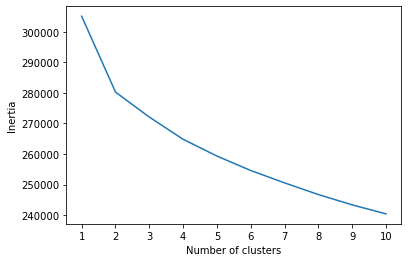

In [55]:
inertia = []

k = [1,2,3,4,5,6,7,8,9,10]



for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_count)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [57]:
kmodel = KMeans(n_clusters=3, random_state=5)

In [58]:
kmodel.fit(X_count)

KMeans(n_clusters=3, random_state=5)

In [63]:
kmodel.score(bX_count)

-5846.363811282564

In [59]:
kpreds = kmodel.predict(bX_count)

In [61]:
kpreds

In [62]:
confusion_matrix(by, kpreds)

array([[63, 55, 68,  0],
       [ 0,  1,  3,  0],
       [ 3,  1,  0,  0],
       [ 2,  3,  0,  0]], dtype=int64)